# Importando bibliotecas que serão utilizadas no projeto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Importando a tabela com os dados filtrados no arquivo 'Data/primeira_selecao_dados.ipynb'


In [3]:
dados1 = pd.read_csv('Data/data_cancer_2005_2019.csv', sep = ',', encoding = 'utf-8', low_memory = False)

In [6]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         957959 non-null  int64  
 1   codigo_paciente    957959 non-null  int64  
 2   local_atendimento  957959 non-null  object 
 3   sexo               957959 non-null  object 
 4   idade              906892 non-null  float64
 5   cor                957959 non-null  object 
 6   nacionalidade      570600 non-null  object 
 7   estado_nascimento  572603 non-null  object 
 8   estado             957923 non-null  object 
 9   data               957958 non-null  object 
 10  data_obito         328005 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 80.4+ MB


In [4]:
dados1.head()

,Unnamed: 0,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


In [5]:
dados1.columns

Index(['Unnamed: 0', 'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
       'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
       'data_obito'],
      dtype='object')

#### Retirando a coluna 'Unnamed: 0'

A coluna 'Unnamed: 0' não tem aplicação nas análises.

In [4]:
dados2 = dados1[[
    'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
    'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
    'data_obito'
]]

In [8]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


## Avaliação dos dados nulo no DataFrame

In [10]:
dados2.shape

(957959, 10)

In [11]:
dados2.isnull().sum()

codigo_paciente           0
local_atendimento         0
sexo                      0
idade                 51067
cor                       0
nacionalidade        387359
estado_nascimento    385356
estado                   36
data                      1
data_obito           629954
dtype: int64

In [14]:
dados2.isna().mean()

codigo_paciente      0.000000
local_atendimento    0.000000
sexo                 0.000000
idade                0.053308
cor                  0.000000
nacionalidade        0.404359
estado_nascimento    0.402268
estado               0.000038
data                 0.000001
data_obito           0.657600
dtype: float64

A quantidade de dados nulos na tabela é muito alto nos campos que se referem à **nacionalidade** ['nacionalidade'], ao **estado de nascimento do paciente** ['estado_nascimento'] e à **data de óbito do paceinte** ['data_obito']. Portanto, **esses dados não serão analisados nessa primeira fase do projeto**.

Porém, as colunas contendo **idade** ['idade'], **estado de moradia do paciente** ['estado'] possuem pocous dados faltantes se considerar o banco de dados total. Logo, esses dados nulos serão analisados e tratados caso a caso.

# ANÁLISE 01 - Variação quantitativa anual de casos

In [5]:
dados2.columns

Index(['codigo_paciente', 'local_atendimento', 'sexo', 'idade', 'cor',
       'nacionalidade', 'estado_nascimento', 'estado', 'data', 'data_obito'],
      dtype='object')

In [ ]:
# Convertendo o campo data do tipo "object" para o tipo "datetime".

dados2['data'] = pd.to_datetime(dados2['data'])

In [8]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   codigo_paciente    957959 non-null  int64         
 1   local_atendimento  957959 non-null  object        
 2   sexo               957959 non-null  object        
 3   idade              906892 non-null  float64       
 4   cor                957959 non-null  object        
 5   nacionalidade      570600 non-null  object        
 6   estado_nascimento  572603 non-null  object        
 7   estado             957923 non-null  object        
 8   data               957958 non-null  datetime64[ns]
 9   data_obito         328005 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 73.1+ MB


In [6]:
# Criando uma coluna contendo só o ano ("ano_atendimento") de cada data contida na coluna 'data'.

dados2['ano_atendimento'] = dados2['data'].dt.year

In [19]:
# Conferindo todos os dados que foram criados na nova coluna "ano_atendimento"

dados2.ano_atendimento.unique()

array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,   nan,
       2013., 2014., 2015., 2016., 2017., 2018., 2019.])

In [10]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,ano_atendimento
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-07-10,07/10/2005,2005.0
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-10-21,21/10/2005,2005.0
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-06-11,06/11/2005,2005.0
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,2005-05-15,15/05/2005,2005.0
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-02-24,24/02/2005,2005.0


In [20]:
# Conferindo se os dados do campo "data" coincidem com os dados da coluna "data_atendimento" criada.

dados_2005 = dados2.loc[dados2['ano_atendimento'] == 2005]
dados_2005.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,ano_atendimento
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-07-10,07/10/2005,2005.0
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-10-21,21/10/2005,2005.0
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-06-11,06/11/2005,2005.0
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,2005-05-15,15/05/2005,2005.0
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2005-02-24,24/02/2005,2005.0


In [21]:
dados_2006 = dados2.loc[dados2['ano_atendimento'] == 2006]
dados_2006.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,ano_atendimento
4131,429828,RCBP SÃO PAULO,FEMININO,NaN,SEM INFORMAÇÃO,NaN,NaN,SÃO PAULO,2006-01-01,NaN,2006.0
6660,429945,RCBP SÃO PAULO,FEMININO,NaN,SEM INFORMAÇÃO,NaN,NaN,SÃO PAULO,2006-01-01,NaN,2006.0
13600,520927,RCBP SÃO PAULO,MASCULINO,66.0,BRANCO,NaN,NaN,SÃO PAULO,2006-01-01,01/01/2006,2006.0
15140,520929,RCBP SÃO PAULO,FEMININO,43.0,BRANCO,NaN,NaN,SÃO PAULO,2006-01-01,01/01/2006,2006.0
15479,690456,RCBP SÃO PAULO,MASCULINO,81.0,BRANCO,NaN,NaN,SÃO PAULO,2006-01-01,01/01/2006,2006.0


In [7]:
# Frequência de cada ano para comparação com gráfico posterior

quantidade_ano = [[dados2['ano_atendimento'].value_counts()]]
quantidade_ano

[[2011.0    118832
  2010.0    110050
  2009.0     95049
  2008.0     87518
  2007.0     80655
  2005.0     69602
  2006.0     68165
  2013.0     67500
  2012.0     66449
  2014.0     62755
  2015.0     61092
  2016.0     42931
  2017.0     24842
  2018.0      1974
  2019.0       544
  Name: ano_atendimento, dtype: int64]]

No handles with labels found to put in legend.


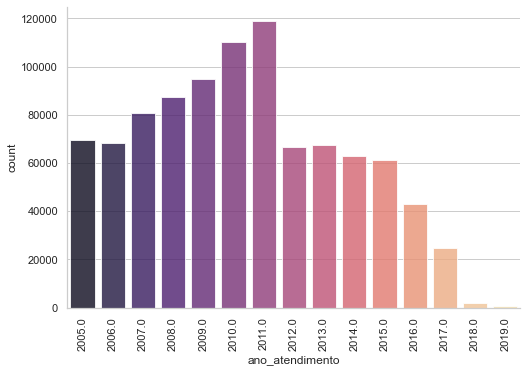

In [51]:
sns.set_theme(style = 'whitegrid')
sns.catplot(data=dados2, x='ano_atendimento', kind='count', palette='magma', aspect=1.5, alpha=.8)
plt.xticks(rotation = 90)
plt.legend().set_visible(False)

plt.show()

**Percebe-se que, nos anos de 2016, 2017, 2018 e 2019, há uma queda anômala nos registros de casos de câncer no banco de dados que esse projeto está trabalhando. Os dados tendiam a um patamar de estabilização conforme mostram os dados em 2012, 2013, 2014 e 2015.** 

In [45]:
# Observação do início e final do dataframe para analisar o ordenamento dos dados por data.

dados_2019 = dados2.loc[dados2['ano_atendimento'] == 2019]
dados_2019.sort_values(by=['data'])

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,ano_atendimento
906556,1462405,RCBP JAHU,MASCULINO,82.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-01-02,NaN,2019.0
906574,1462386,RCBP JAHU,MASCULINO,73.0,BRANCO,BRASIL,RIO DE JANEIRO,SÃO PAULO,2019-01-03,NaN,2019.0
906686,1462494,RCBP JAHU,FEMININO,55.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-01-04,NaN,2019.0
906764,1462365,RCBP JAHU,MASCULINO,46.0,BRANCO,BRASIL,PARANÁ,SÃO PAULO,2019-01-04,NaN,2019.0
906602,1462343,RCBP JAHU,MASCULINO,58.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-01-04,NaN,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
906654,1462095,RCBP JAHU,FEMININO,74.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-12-20,25/12/2019,2019.0
907019,1462220,RCBP JAHU,FEMININO,76.0,BRANCO,PORTUGAL,Não informado,SÃO PAULO,2019-12-20,NaN,2019.0
906993,1462245,RCBP JAHU,MASCULINO,33.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-12-23,NaN,2019.0
906770,1462370,RCBP JAHU,MASCULINO,67.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,2019-12-27,26/03/2021,2019.0


## Conclusões (ANÁLISE 01 - Variação quantitativa anual de casos)

I. Nos anos de 2007 a 2011, houve um aumento significativo dos diagnósticos de câncer no Brasil. Isso pode ser associado às seguintes causas:
> * maior acesso da população ao sistema de saúde público ou privado,
> * crescimento e melhorias implementadas nos serviços de saúde prestados,
> * investimento em campanhas de conscientização populacional a respeito da doença,
> * diagnósticos pré óbito.

II. Os dados faltosos dos anos de 2018 e 2019 são dados consideráveis para análise e sua supressão pode ter diversos motivos como:
> * o fornecedor do banco de dados enviou arquivos incompletos,
> * os dados desses anos estão sendo armazenados em outro banco de dados no momento,
> * os órgãos responsáveis estão tendo dificuldade em armazenar e receber os dados do sistema de saúde.

Embora haja dados faltososo relevantes, as análises continuarão nesse projeto. Numa outra fase desse projeto, os dados serão novamente trabalhados com as possíveis correções, junto ao fornecedo, não cabíveis no momentoS.

# ANÁLISE 02 - Distribuição por sexos dos pacientes

In [67]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   codigo_paciente     957959 non-null  int64  
 1   local_atendimento   957959 non-null  object 
 2   sexo                957959 non-null  object 
 3   idade               906892 non-null  float64
 4   cor                 957959 non-null  object 
 5   nacionalidade       570600 non-null  object 
 6   estado_nascimento   572603 non-null  object 
 7   estado              957923 non-null  object 
 8   data                957958 non-null  object 
 9   data_obito          328005 non-null  object 
 10  estado_atendimento  957959 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 80.4+ MB


In [10]:
dados2.sexo.unique()

array(['MASCULINO', 'FEMININO', 'IGNORADO'], dtype=object)

In [11]:
# A coluna contendo os dados do sexo do paciente não tem valores nulos.

dados2.isnull().sum()

codigo_paciente           0
local_atendimento         0
sexo                      0
idade                 51067
cor                       0
nacionalidade        387359
estado_nascimento    385356
estado                   36
data                      1
data_obito           629954
dtype: int64

In [4]:
# Valor total de ocorrência de cada dado. 

dados2['sexo'].value_counts()

FEMININO     527913
MASCULINO    429937
IGNORADO        109
Name: sexo, dtype: int64

In [28]:
sexos = dados2[dados2['sexo'] == 'IGNORADO'].index

In [29]:
# Retirada do valor "IGNORADO" para alguns gráficos.

sexos_masc_fem = dados2.drop(sexos)

In [30]:
# Conversão em DataFrame

sexos_masc_fem_df = pd.DataFrame(sexos_masc_fem)

In [38]:
gf_pizza_sexos = sexos_masc_fem_df['sexo'].value_counts()

O dados abaixo do CENSO de 2010 foram tirados do site do **IBGE** disponível em:

<https://www.ibge.gov.br/estatisticas/sociais/educacao/9662-censo-demografico-2010.html?t=destaques>

In [32]:
# Quantidade de homens e mulheres no Brasil segundo o CENSO de 2010 - último censo efetivado.

homens = 93406990
mulheres = 97348809
total =  97348809 + 93406990
censo_2010 = [93406990, 97348809]

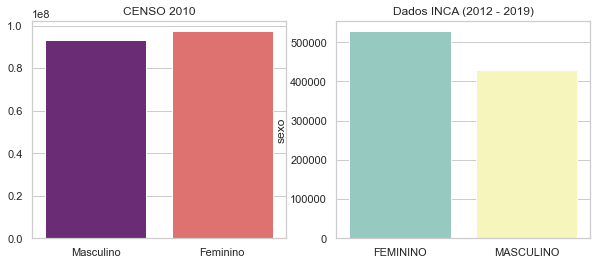

In [48]:
# Gráfico de comparação entre a proporção de homens e mulheres no Brasil em 2010 e os dados de pacientes com câncer.

#sns.catplot(data=censo_2010, x=['Masculino','Feminino'], palette='magma', aspect=1.5)
#plt.xticks(rotation = 90)
#plt.legend().set_visible(False)

sns.set_theme(style = 'whitegrid')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

x1 = ['Masculino', 'Feminino']

ax1.set_title('CENSO 2010')
sns.barplot(
        x = x1,
        y = censo_2010,
        palette = 'magma',
        ax = ax1
)

ax2.set_title('Dados INCA (2012 - 2019)')

#ax2.pie(
 #       gf_pizza_sexos, 
  #      labels= ['FEMININO','MASCULINO'],
   #     autopct='%1.1f%%',
    #    colors= ["lightsalmon","lightsteelblue"]
#)
sns.barplot(
        x = ['FEMININO','MASCULINO'],
        y = gf_pizza_sexos,
        palette = 'Set3',
        ax = ax2
)

plt.show()


**Nota-se que a distribuição não é distonante da realidade brasileira.**

In [18]:
sexos_masc_fem_df.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


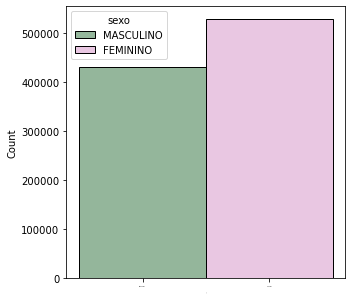

In [33]:
# Gráfico quantidade de homens e de mulheres no banco de dados em valores absolutos.
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(5,5))
sns.histplot(data=sexos_masc_fem_df, x='sexo', hue='sexo', palette='cubehelix')
plt.tick_params(axis='x', labelsize=0)
plt.xlabel([], fontsize=0)
plt.show()


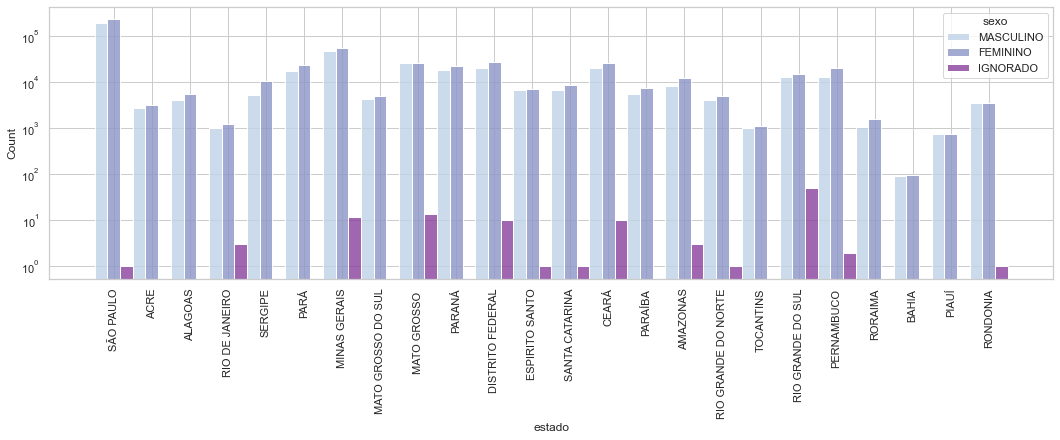

In [53]:
# Gráfico contendo a quantidade de homens e mulheres que tiveram ou têm câncer por estado e considerando o valor "IGNORADO"
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(18,5))
sns.histplot(data=dados2, x='estado', hue='sexo', multiple="dodge", log_scale=(False,True), palette='BuPu', alpha=.8 )
plt.xticks(rotation = 90)

plt.show()

**Observa-se que o valor "IGNORADO" para sexo não é algo recorrente em todos os estados brasileiros. Porém, ele está presente 13 dos 23 estados e no Distrito Federal.**

## Conclusões (ANÁLISE 02 - Distribuição por sexos dos pacientes)

I. A distribuição de casos de câncer entre os sexo se revelou parecida com a distribuição dos sexos na população no CENSO de 2010. Pode-se concluir disso que não há uma predominância importante dos casos de câncer entre os sexos, embora cada um possua pré-disposição conforme características genéticas do sexo pertencente.

II. A presença do valor "IGNORADO" pode ser devido:
> * a falta de atenção da pessoa que faz as fichas de cadastos ou de quem as coloca no banco de dados,
> * ao paciente ser do grupo LGBTQIA+ e o atendente não ter experiência em como proceder nesse caso ou preconceito.

# ANÁLISE 03 - Idades

In [28]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


In [32]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codigo_paciente    957959 non-null  int64  
 1   local_atendimento  957959 non-null  object 
 2   sexo               957959 non-null  object 
 3   idade              906892 non-null  float64
 4   cor                957959 non-null  object 
 5   nacionalidade      570600 non-null  object 
 6   estado_nascimento  572603 non-null  object 
 7   estado             957923 non-null  object 
 8   data               957958 non-null  object 
 9   data_obito         328005 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 73.1+ MB


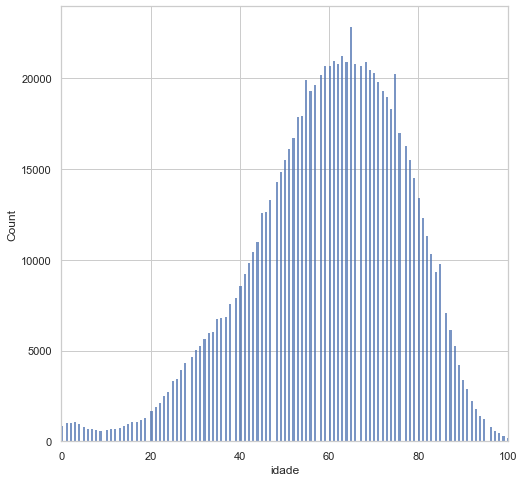

In [54]:
# Histograma da idade em relação a quantidade de casos

plt.figure(figsize=(8,8))
sns.histplot(data=dados2, x='idade', palette='magma')
plt.xlim(0,100)

plt.show()

**Nota-se que o intervalo com maior quantidade de pessoas com diagnóstico de câncer é dos 45 aos 80 anos de dade.**

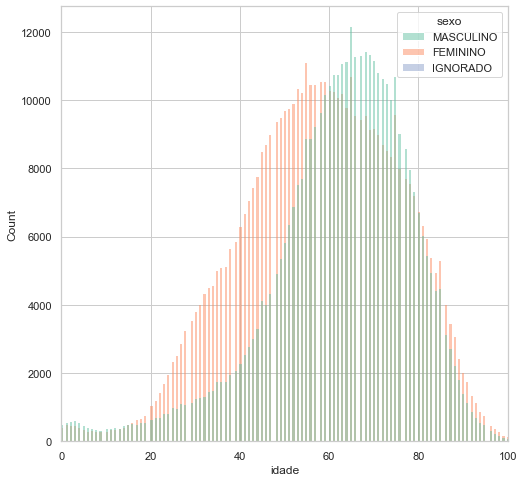

In [57]:
# Histograma da idade em relação a quantidade de casos separdas por sexo

plt.figure(figsize=(8,8))
sns.histplot(data=dados2, x='idade', hue='sexo', palette = 'Set2')
plt.xlim(0,100)

plt.show()

**Pelo gráfico, fica evidente que a quatindade mulheres entre os 20 ao 55 com diagnóstico de câncer é significativamente maior que a quantidade de homens nessa mesma faixa etária.**

## Conclusões (ANÁLISE 02 - Idades)

A análise do gráfico geral ratifica que o câncer tem maior ocorrência entre pessoas acima dos 50 anos de idade. No entanto, a quantidade de casos abaixo dos 50 anos de idade também é preocupante, principalmente em mulheres. Isso pode ser devido ao fato do câncer de mama e de útero acontecerem, geralmente, antes nas mulheres do que o câncer de próstota nos homens ou, também, pelo fato de a mulher ter maior cuidado com a saúde e favorecer um diagnóstico precoce.

# ANÁLISE 04 - Quantidade de casos por estado

In [20]:
sexos_masc_fem_df.columns

Index(['codigo_paciente', 'local_atendimento', 'sexo', 'idade', 'cor',
       'nacionalidade', 'estado_nascimento', 'estado', 'data', 'data_obito'],
      dtype='object')

In [21]:
# Quantidade de dados por estado

gf_pizza_estados = dados2['estado'].value_counts()
gf_pizza_estados

SÃO PAULO              430767
MINAS GERAIS           102853
MATO GROSSO             53060
CEARÁ                   48026
DISTRITO FEDERAL        47590
PARÁ                    42463
PARANÁ                  41153
PERNAMBUCO              33626
RIO GRANDE DO SUL       28495
AMAZONAS                20605
SERGIPE                 15938
SANTA CATARINA          15851
ESPIRITO SANTO          14056
PARAÍBA                 12941
ALAGOAS                  9688
MATO GROSSO DO SUL       9655
RIO GRANDE DO NORTE      9120
RONDONIA                 7142
ACRE                     6031
RORAIMA                  2716
RIO DE JANEIRO           2264
TOCANTINS                2179
PIAUÍ                    1512
BAHIA                     192
Name: estado, dtype: int64

In [22]:
# Tiposde valores que aparecem nos dados por estado

dados2.estado.unique()

array(['SÃO PAULO', 'ACRE', 'ALAGOAS', 'RIO DE JANEIRO', 'SERGIPE',
       'PARÁ', 'MINAS GERAIS', nan, 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'PARANÁ', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'SANTA CATARINA',
       'CEARÁ', 'PARAÍBA', 'AMAZONAS', 'RIO GRANDE DO NORTE', 'TOCANTINS',
       'RIO GRANDE DO SUL', 'PERNAMBUCO', 'RORAIMA', 'BAHIA', 'PIAUÍ',
       'RONDONIA'], dtype=object)

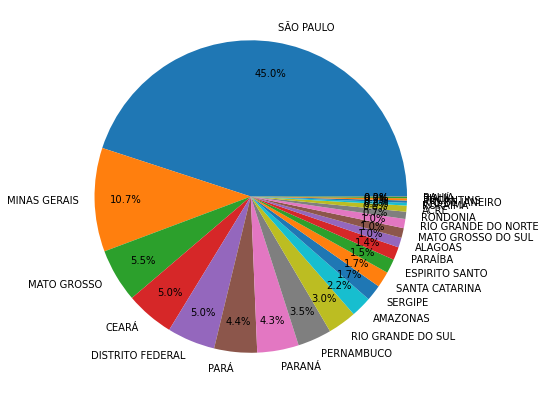

In [23]:
# Gráfico da porcentagem de casos por estados

plt.figure(figsize=(7,7))

'''
plt.axis('equal')
plt.pie(gf_pizza_estados,
        labels=['SÃO PAULO',
                'MINAS GERAIS',
                'MATO GROSSO',
                'CEARÁ',
                'DISTRITO FEDERAL',
                'PARÁ',
                'PARANÁ',
                'PERNAMBUCO',
                'RIO GRANDE DO SUL',
                'AMAZONAS',
                'SERGIPE',
                'SANTA CATARINA',
                'ESPIRITO SANTO',
                'PARAÍBA',
                'ALAGOAS',
                'MATO GROSSO DO SUL',
                'RIO GRANDE DO NORTE',
                'RONDONIA',
                'ACRE',
                'RORAIMA',
                'RIO DE JANEIRO',
                'TOCANTINS',
                'PIAUÍ',
                'BAHIA'],
        autopct='%1.1f%%',
        pctdistance= 0.8
)
'''
plt.show()

**Estados de destaque na quantidade de diagnósticos: São Paulo, Minas Gerais, Mato Grosso, Ceará, Distrito Federal, Pará, Paraná.**

No handles with labels found to put in legend.


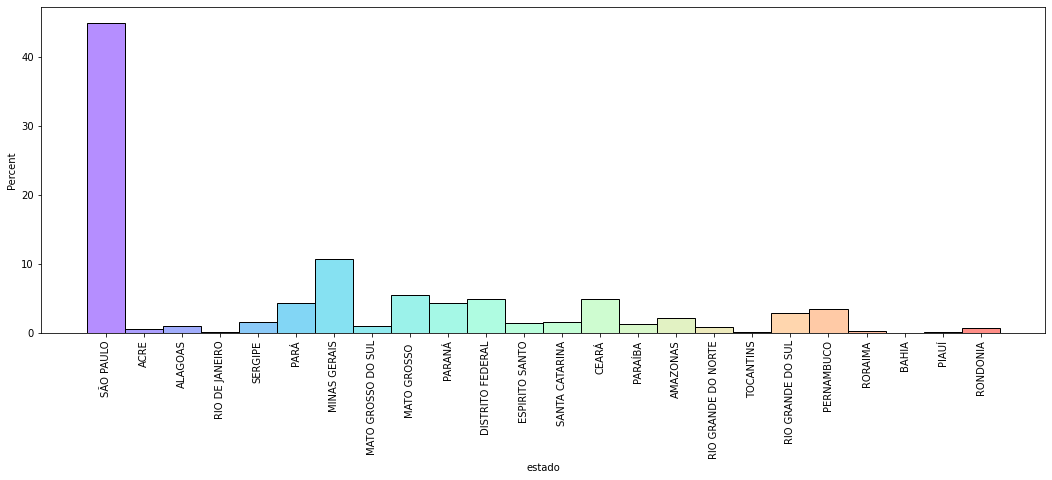

In [26]:
# Gráfico da quantidade absoluta de casos por estado

plt.figure(figsize=(18,6))
sns.histplot(data=dados2, x='estado', hue='estado', stat='percent', palette='rainbow')
plt.xticks(rotation = 90)
plt.legend().set_visible(False)

plt.show()

## Conclusão (ANÁLISE 04 - Quantidade de casos por estado)

I. Os possíveis motivos pelo qual São Paulo detém 45% dos diagnósticos de câncer são:
> * é referência nacional no que se refere ao tratamento de câncer com melhor infraestrutura, portanto é provavél que há grande fluxo de pessoas para essa região em busca de melhores tratamentos de câncer (Destaque para o Hospital do Amor em Barretos, o maior da América Latina),
> * é o estado mais populoso e povoado do país (IBGE - CENSO 2010) e, consequentemente, possuem maior quantidade de casos.

II. Os outros estados como Minas Gerais, Mato Grosso, Ceará, Rio Grande do Sul, Paraná, Pará e o Distrito Federal possuem elevados números de diagnóstico pode ser relacionado ao fato de serem estados de grande importância econômica para suas respectivas regiões, por isso, é onde concentram-se os pólos em saúde.


# ANÁLISE 05 - Deslocamentos dos pacientes para tratamento

## 5.1. Adicionando a coluna que mostra o estado em que aconteceu o atendimento.

A base de dados mostra o nome do local de atendimento e o endereço do paciente. Para analisar um possível movimento interestadual de pacientes, faz-se necessário associar o nome do local do antendimento com o estado de pertecimento e colocar numa coluna.

In [40]:
# Identificação dos dados que aparecem na coluna 'local_atendimento'

dados2.local_atendimento.unique()

array(['RCBP CAMPINAS-UNICAMP', 'RCBP SÃO PAULO', 'RCBP ACRE',
       'RCBP ALAGOAS', 'RCBP ANGRA DOS REIS', 'RCBP ARACAJU',
       'RCBP BELÉM', 'RCBP BELO HORIZONTE', 'RCBP CAMPINAS-SMS',
       'RCBP CAMPO GRANDE', 'RCBP CUIABA', 'RCBP CURITIBA',
       'RCBP MATO GROSSO (INTERIOR)', 'RCBP DISTRITO FEDERAL',
       'RCBP DRS BARRETOS', 'RCBP ESPÍRITO SANTO', 'RCBP FLORIANOPOLIS',
       'RCBP FORTALEZA', 'RCBP JAHU', 'RCBP JOAO PESSOA', 'RCBP MANAUS',
       'RCBP NATAL', 'RCBP PALMAS', 'RCBP POÇOS DE CALDAS',
       'RCBP PORTO ALEGRE', 'RCBP RECIFE', 'RCBP RORAIMA',
       'RCBP SALVADOR', 'RCBP SANTOS', 'RCBP TERESINA', 'RCBP GOIÂNIA',
       'RCBP RONDONIA'], dtype=object)

In [41]:
# Condições e dados para a nova coluna

conditionlist=[
    (dados2['local_atendimento']=='RCBP CAMPINAS-UNICAMP'),
    (dados2['local_atendimento']=='RCBP SÃO PAULO'),
    (dados2['local_atendimento']=='RCBP ACRE'),
    (dados2['local_atendimento']=='RCBP ALAGOAS'),
    (dados2['local_atendimento']=='RCBP ANGRA DOS REIS'),
    (dados2['local_atendimento']=='RCBP ARACAJU'),
    (dados2['local_atendimento']=='RCBP BELÉM'),
    (dados2['local_atendimento']=='RCBP BELO HORIZONTE'),
    (dados2['local_atendimento']=='RCBP CAMPINAS-SMS'),
    (dados2['local_atendimento']=='RCBP CAMPO GRANDE'),
    (dados2['local_atendimento']=='RCBP CUIABA'),
    (dados2['local_atendimento']=='RCBP CURITIBA'),
    (dados2['local_atendimento']=='RCBP MATO GROSSO (INTERIOR)'),
    (dados2['local_atendimento']=='RCBP DISTRITO FEDERAL)'),
    (dados2['local_atendimento']=='RCBP DRS BARRETOS'),
    (dados2['local_atendimento']=='RCBP ESPÍRITO SANTO'),
    (dados2['local_atendimento']=='RCBP FLORIANOPOLIS'),
    (dados2['local_atendimento']=='RCBP FORTALEZA'),
    (dados2['local_atendimento']=='RCBP JAHU'),
    (dados2['local_atendimento']=='RCBP JOAO PESSOA'),
    (dados2['local_atendimento']=='RCBP MANAUS'),
    (dados2['local_atendimento']=='RCBP NATAL'),
    (dados2['local_atendimento']=='RCBP PALMAS'),
    (dados2['local_atendimento']=='RCBP POÇOS DE CALDAS'),
    (dados2['local_atendimento']=='RCBP PORTO ALEGRE'),
    (dados2['local_atendimento']=='RCBP RECIFE'),
    (dados2['local_atendimento']=='RCBP RORAIMA'),
    (dados2['local_atendimento']=='RCBP SALVADOR'),
    (dados2['local_atendimento']=='RCBP SANTOS'),
    (dados2['local_atendimento']=='RCBP TERESINA'),
    (dados2['local_atendimento']=='RCBP GOIÂNIA'),
    (dados2['local_atendimento']=='RCBP RONDONIA'),
]

choicelist = [
    'SÃO PAULO',
    'SÃO PAULO', 
    'ACRE',
    'ALAGOAS',
    'RIO DE JANEIRO',
    'SERGIPE',
    'PARÁ',
    'MINAS GERAIS',
    'SÃO PAULO',
    'MATO GROSSO DO SUL', 
    'MATO GROSSO',
    'PARANÁ',
    'MATO GROSSO',
    'DISTRITO FEDERAL',
    'SÃO PAULO',
    'ESPÍRITO SANTO', 
    'SANTA CATARINA',
    'CEARÁ', 
    'SÃO PAULO', 
    'PARAÍBA',
    'AMAZONAS',
    'RIO GRANDE DO NORTE', 
    'TOCANTINS', 
    'MINAS GERAIS',
    'RIO GRANDE DO SUL', 
    'PERNAMBUCO', 
    'RORAIMA',
    'BAHIA',
    'SÃO PAULO', 
    'PIAUÍ', 
    'GOIÁS',
    'RONDONIA'
]

In [42]:
# Criação da nova coluna

dados2['estado_atendimento']= np.select(conditionlist, choicelist, default='Not Specified')

In [51]:
dados2

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,estado_atendimento
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005,SÃO PAULO
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005,SÃO PAULO
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005,SÃO PAULO
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005,SÃO PAULO
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005,SÃO PAULO
...,...,...,...,...,...,...,...,...,...,...,...
957954,1331797,RCBP RONDONIA,MASCULINO,68.0,PARDA,BRASIL,GOIAS,RONDONIA,03/07/2017,14/03/2019,RONDONIA
957955,1331551,RCBP RONDONIA,FEMININO,24.0,PARDA,BRASIL,RONDONIA,RONDONIA,17/07/2017,06/08/2018,RONDONIA
957956,1331058,RCBP RONDONIA,FEMININO,56.0,BRANCO,BRASIL,MINAS GERAIS,RONDONIA,08/02/2017,08/06/2018,RONDONIA
957957,1331001,RCBP RONDONIA,MASCULINO,40.0,PARDA,BRASIL,RONDONIA,RONDONIA,27/06/2017,30/04/2018,RONDONIA


In [44]:
# Seleção do estado de São Paulo para análise

deslocamento_sp = dados2.loc[dados2['estado_atendimento'] == 'SÃO PAULO']

In [45]:
deslocamento_sp

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,estado_atendimento
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005,SÃO PAULO
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005,SÃO PAULO
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005,SÃO PAULO
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005,SÃO PAULO
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005,SÃO PAULO
...,...,...,...,...,...,...,...,...,...,...,...
907023,1462216,RCBP JAHU,FEMININO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,09/09/2019,NaN,SÃO PAULO
907024,1462215,RCBP JAHU,FEMININO,58.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/04/2019,NaN,SÃO PAULO
907025,1462214,RCBP JAHU,FEMININO,94.0,BRANCO,BRASIL,CEARÁ,SÃO PAULO,05/09/2019,NaN,SÃO PAULO
907026,1461932,RCBP JAHU,MASCULINO,65.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,13/03/2019,NaN,SÃO PAULO


In [56]:
deslocamento_sp.estado.unique()

array(['SÃO PAULO'], dtype=object)

**Pelos dados, não houve migração de pessoas em busca de tratamento em São Paulo. Isso não é o que ocorre na prática.**

In [60]:
deslocamento_sp.estado_nascimento.unique()

array(['SÃO PAULO', 'ALAGOAS', 'Não informado', 'SANTA CATARINA',
       'PERNAMBUCO', 'MINAS GERAIS', 'RIO GRANDE DO SUL', 'PARANÁ',
       'PARÁ', 'CEARÁ', 'PARAÍBA', 'BAHIA', 'MATO GROSSO DO SUL',
       'RIO GRANDE DO NORTE', 'SERGIPE', 'TOCANTINS', 'RIO DE JANEIRO',
       'MARANHÃO', 'PIAUÍ', 'MATO GROSSO ', 'ESPIRITO SANTO',
       'DISTRITO FEDERAL', 'GOIAS', nan, 'AMAZONAS', 'ACRE', 'RONDONIA',
       'AMAPA', 'RORAIMA'], dtype=object)

**Comparando com os estado de nascimento das pessoas, nota-se uma possível movimentação. No entanto, não se pode afirmar que o estado de nascimento é o estado de residência da pessoa no momento do diagnóstico. Poranto, fica inconclusivo.**

**Abaixo, a avaliação dos dados de estado de Minas Gerais para avaliar os observados no estado de São Paulo.**

In [57]:


deslocamento_mg = dados2.loc[dados2['estado_atendimento'] == 'MINAS GERAIS']

In [58]:
deslocamento_mg

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,estado_atendimento
358007,754835,RCBP BELO HORIZONTE,FEMININO,82.0,BRANCO,BRASIL,MINAS GERAIS,MINAS GERAIS,27/05/2005,19/02/2007,MINAS GERAIS
358008,532813,RCBP BELO HORIZONTE,MASCULINO,75.0,PARDA,Não informado,Não informado,MINAS GERAIS,17/01/2005,17/01/2005,MINAS GERAIS
358009,532899,RCBP BELO HORIZONTE,FEMININO,79.0,BRANCO,Não informado,Não informado,MINAS GERAIS,28/12/2005,28/12/2005,MINAS GERAIS
358010,507753,RCBP BELO HORIZONTE,FEMININO,50.0,SEM INFORMAÇÃO,BRASIL,Não informado,MINAS GERAIS,02/06/2005,NaN,MINAS GERAIS
358011,752414,RCBP BELO HORIZONTE,FEMININO,75.0,BRANCO,BRASIL,MINAS GERAIS,MINAS GERAIS,03/01/2005,20/06/2007,MINAS GERAIS
...,...,...,...,...,...,...,...,...,...,...,...
925604,1189251,RCBP POÇOS DE CALDAS,MASCULINO,72.0,BRANCO,BRASIL,MINAS GERAIS,MINAS GERAIS,22/09/2014,NaN,MINAS GERAIS
925605,1192163,RCBP POÇOS DE CALDAS,FEMININO,83.0,BRANCO,BRASIL,SÃO PAULO,MINAS GERAIS,20/05/2014,NaN,MINAS GERAIS
925606,1190651,RCBP POÇOS DE CALDAS,MASCULINO,87.0,BRANCO,BRASIL,MINAS GERAIS,MINAS GERAIS,13/06/2014,31/01/2016,MINAS GERAIS
925607,1195654,RCBP POÇOS DE CALDAS,FEMININO,89.0,BRANCO,BRASIL,MINAS GERAIS,MINAS GERAIS,08/10/2014,13/12/2015,MINAS GERAIS


In [59]:
deslocamento_mg.estado.unique()

array(['MINAS GERAIS', nan], dtype=object)

In [61]:
deslocamento_mg.estado_nascimento.unique()

array(['MINAS GERAIS', 'Não informado', 'RIO DE JANEIRO',
       'ESPIRITO SANTO', 'BAHIA', 'SÃO PAULO', 'GOIAS', 'PARANÁ',
       'PERNAMBUCO', 'CEARÁ', 'RIO GRANDE DO SUL', 'PARAÍBA', 'PARÁ',
       'RIO GRANDE DO NORTE', 'PIAUÍ', 'MARANHÃO', 'DISTRITO FEDERAL',
       'MATO GROSSO DO SUL', 'SERGIPE', 'AMAZONAS', 'SANTA CATARINA',
       'ALAGOAS', 'MATO GROSSO ', 'ACRE', 'RONDONIA', 'TOCANTINS',
       'RORAIMA'], dtype=object)

**Abaixo, a avaliação dos dados de estado de Minas Gerais para avaliar os observados no estado de São Paulo.**

In [62]:
deslocamento_pa = dados2.loc[dados2['estado_atendimento'] == 'PARÁ']

In [63]:
deslocamento_pa 

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,estado_atendimento
336923,765279,RCBP BELÉM,MASCULINO,NaN,SEM INFORMAÇÃO,BRASIL,Não informado,PARÁ,10/10/2005,NaN,PARÁ
336924,909211,RCBP BELÉM,FEMININO,64.0,SEM INFORMAÇÃO,BRASIL,PARÁ,PARÁ,15/06/2005,NaN,PARÁ
336925,765349,RCBP BELÉM,FEMININO,62.0,BRANCO,BRASIL,PARÁ,PARÁ,11/05/2005,05/08/2005,PARÁ
336926,765436,RCBP BELÉM,FEMININO,52.0,PARDA,BRASIL,MARANHÃO,PARÁ,18/01/2005,24/05/2005,PARÁ
336927,765560,RCBP BELÉM,MASCULINO,63.0,SEM INFORMAÇÃO,BRASIL,Não informado,PARÁ,12/09/2005,NaN,PARÁ
...,...,...,...,...,...,...,...,...,...,...,...
722599,1421803,RCBP BELÉM,MASCULINO,73.0,SEM INFORMAÇÃO,BRASIL,Não informado,PARÁ,01/07/2017,29/03/2018,PARÁ
722600,1427218,RCBP BELÉM,FEMININO,83.0,BRANCO,BRASIL,PARÁ,PARÁ,26/12/2017,11/01/2018,PARÁ
722601,1288417,RCBP BELÉM,MASCULINO,8.0,PARDA,BRASIL,PARÁ,PARÁ,03/04/2017,03/04/2017,PARÁ
722602,1450481,RCBP BELÉM,MASCULINO,70.0,BRANCO,BRASIL,PARÁ,PARÁ,15/04/2017,05/10/2018,PARÁ


In [66]:
deslocamento_pa.estado.unique()

array(['PARÁ'], dtype=object)

In [64]:
deslocamento_pa.estado_nascimento.unique()

array(['Não informado', 'PARÁ', 'MARANHÃO', 'AMAZONAS', 'SÃO PAULO',
       'RONDONIA', 'PIAUÍ', 'PERNAMBUCO', 'CEARÁ', 'RIO DE JANEIRO',
       'ACRE', 'MINAS GERAIS', 'RIO GRANDE DO NORTE', 'GOIAS',
       'RIO GRANDE DO SUL', 'AMAPA', 'PARAÍBA', 'TOCANTINS',
       'ESPIRITO SANTO', 'BAHIA', 'RORAIMA', 'MATO GROSSO DO SUL',
       'SANTA CATARINA', 'ALAGOAS', 'PARANÁ', 'MATO GROSSO ', 'SERGIPE',
       'DISTRITO FEDERAL'], dtype=object)

## Conclusões (ANÁLISE 04 - Deslocamentos dos pacientes para tratamento)

Os dados da coluna 'estado' disponibilizados não correspodem ao estado de endereço do paciente e sim do local do diagnóstico. Em virtude disso, não pode-se inferir uma migração de pessoas para atendimento médico relacionado ao câncer com essa base de dados.